# Mapping

Creating maps is a fun and informative way of handling geospatial data. In this notebook, we will explore basic techniques in mapping with Python.

## A. Geopandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

**For this exercise, our goal is to create a heatmap of different metrics.**

To use geopandas, we need to install it first before importing the library. You may read on the geopandas installation guide [here](https://geopandas.org/en/v0.4.0/install.html).

In [1]:
# pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Geopandas allows you to read different map file formats such as shapefiles (shp). Geospatial data always have a column that contains coordinates. In this data, it is the `geometry` column. Load the data to check. 

In [3]:
shapefile = gpd.read_file('data/Provinces/Provinces.shp')
shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


When working with geospatial data, although the data looks very similar, the data type is in fact different than the usual DataFrame. 

In [4]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In some shapefiles, the longitude and latitude are already separated. In this case, however, we would still need to separate it using the centroid function.

In [5]:
shapefile["x"] = shapefile.geometry.centroid.x
shapefile["y"] = shapefile.geometry.centroid.y

shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,x,y
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",120.805536,17.579238
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",125.522900,9.014507
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",125.757300,8.403420
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",122.247555,11.609857
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",123.615464,13.211274


If you plot this dataframe, you will see the shape of the Philippines with the buondaries of each province.

In [6]:
# !pip install descartes

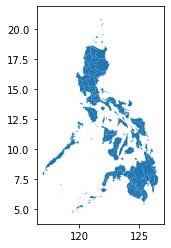

In [7]:
shapefile.plot()

If we want to create a heatmap, we would need the boundaries of the areas of interest and the other points that we want to plot. Since we have already loaded our map, we just need to load the datarame of the informmation we want to map and merge it with the `shapefile`.

In [8]:
voter = pd.read_csv('data/2016-2019-voter-data.csv')

In [9]:
voter.head()

,Region,Province,Municipality,2016-Registered_Voters,2016-Registered_Male,2016-Registered_Female,2016-Registered_17-19,2016-Registered_20-24,2016-Registered_25-29,2016-Registered_30-34,...,2019-Clustered_Precincts,2019-Registered_Voters,2019-Registered_Male,2019-Registered_Female,2019-Actual_Voters,2019-Actual_Voters_Male,2019-Actual_Voters_Female,2019-Total_Voters_Turnout,2019-Male_Voters_Turnout,2019-Female_Voters_Turnout
0,ARMM,BASILAN,AKBAR,5349.0,2560.0,2789.0,137.0,1411.0,674.0,613.0,...,11,6183,2943,3240,4303,1942,2361,69.59,65.99,72.87
1,ARMM,BASILAN,AL-BARKA,7332.0,3371.0,3961.0,46.0,1903.0,1029.0,936.0,...,16,9074,4284,4790,6782,3110,3672,74.74,72.60,76.66
2,ARMM,BASILAN,HADJI MOHAMMAD AJUL,8594.0,4299.0,4295.0,1232.0,1716.0,1162.0,908.0,...,16,11193,5664,5529,6906,3535,3371,61.70,62.41,60.97
3,ARMM,BASILAN,HADJI MUHTAMAD,8135.0,4326.0,3809.0,211.0,1809.0,1227.0,1095.0,...,15,9373,4968,4405,6428,3401,3027,68.58,68.46,68.72
4,ARMM,BASILAN,LAMITAN CITY,45827.0,22505.0,23322.0,5623.0,7227.0,5375.0,4767.0,...,73,51623,25447,26176,37589,18835,18754,72.81,74.02,71.65


In [10]:
# aligning province in 2016-2019-voter-data to shapefile province
province = {}

for i in voter["Province"].unique(): 
    s_province = [x for x in shapefile["PROVINCE"].unique() if i == x.upper()]
    if len(s_province) == 1:
        province[i] = s_province[0]
    else:
        province[i] = 'INPUT'

province

{'BASILAN': 'Basilan',
 'LANAO DEL SUR': 'Lanao del Sur',
 'MAGUINDANAO': 'Maguindanao',
 'SULU': 'Sulu',
 'TAWI-TAWI': 'Tawi-Tawi',
 'ABRA': 'Abra',
 'APAYAO': 'Apayao',
 'BENGUET': 'Benguet',
 'IFUGAO': 'Ifugao',
 'KALINGA': 'Kalinga',
 'MOUNTAIN PROVINCE': 'Mountain Province',
 'AGUSAN DEL NORTE': 'Agusan del Norte',
 'AGUSAN DEL SUR': 'Agusan del Sur',
 'DINAGAT ISLANDS': 'Dinagat Islands',
 'SURIGAO DEL NORTE': 'Surigao del Norte',
 'SURIGAO DEL SUR': 'Surigao del Sur',
 'NCR': 'INPUT',
 'ILOCOS NORTE': 'Ilocos Norte',
 'ILOCOS SUR': 'Ilocos Sur',
 'LA UNION': 'La Union',
 'PANGASINAN': 'Pangasinan',
 'BATANES': 'Batanes',
 'CAGAYAN': 'Cagayan',
 'ISABELA': 'Isabela',
 'NUEVA VIZCAYA': 'Nueva Vizcaya',
 'QUIRINO': 'Quirino',
 'AURORA': 'Aurora',
 'BATAAN': 'Bataan',
 'BULACAN': 'Bulacan',
 'NUEVA ECIJA': 'Nueva Ecija',
 'PAMPANGA': 'Pampanga',
 'TARLAC': 'Tarlac',
 'ZAMBALES': 'Zambales',
 'BATANGAS': 'Batangas',
 'CAVITE': 'Cavite',
 'LAGUNA': 'Laguna',
 'QUEZON': 'Quezon',
 'RIZ

In [11]:
##Manually inserting Province
province['NCR'] = 'Metropolitan Manila'
province['DAVAO OCCIDENTAL'] = 'Shariff Kabunsuan'

# Replace province name
voter["Province"] = voter["Province"].replace(province)
print(sorted(voter["Province"].unique()))

['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila', 'Misamis Occidental', 'Misamis Oriental', 'Mountain Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Rizal', 'Romblon', 'Samar', 'Sarangani', 'Shariff Kabunsuan', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Sou

In [12]:
voter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             1634 non-null   object 
 1   Province                           1634 non-null   object 
 2   Municipality                       1634 non-null   object 
 3   2016-Registered_Voters             1634 non-null   float64
 4   2016-Registered_Male               1634 non-null   float64
 5   2016-Registered_Female             1634 non-null   float64
 6   2016-Registered_17-19              1634 non-null   float64
 7   2016-Registered_20-24              1634 non-null   float64
 8   2016-Registered_25-29              1634 non-null   float64
 9   2016-Registered_30-34              1634 non-null   float64
 10  2016-Registered_35-39              1634 non-null   float64
 11  2016-Registered_40-44              1634 non-null   float

In [13]:
#dropping unnecessary columns
voter = voter.iloc[:,:4]
voter

,Region,Province,Municipality,2016-Registered_Voters
0,ARMM,Basilan,AKBAR,5349.0
1,ARMM,Basilan,AL-BARKA,7332.0
2,ARMM,Basilan,HADJI MOHAMMAD AJUL,8594.0
3,ARMM,Basilan,HADJI MUHTAMAD,8135.0
4,ARMM,Basilan,LAMITAN CITY,45827.0
...,...,...,...,...
1629,REGION XII,Sultan Kudarat,LUTAYAN,31138.0
1630,REGION XII,Sultan Kudarat,PALIMBANG,32517.0
1631,REGION XII,Sultan Kudarat,PRESIDENT QUIRINO,21498.0
1632,REGION XII,Sultan Kudarat,SEN. NINOY AQUINO,23527.0


In [14]:
voter.columns

Index(['Region', 'Province', 'Municipality', '2016-Registered_Voters'], dtype='object')

In [15]:
#sum per province
province_data = voter.groupby("Province")['2016-Registered_Voters'].sum().reset_index()

province_data

,Province,2016-Registered_Voters
0,Abra,156968.0
1,Agusan del Norte,411961.0
2,Agusan del Sur,373500.0
3,Aklan,345359.0
4,Albay,742204.0
...,...,...
77,Tawi-Tawi,183879.0
78,Zambales,462732.0
79,Zamboanga Sibugay,350699.0
80,Zamboanga del Norte,605146.0


In [16]:
#converting in Millions
province_data ['2016-Registered_Voters'] = province_data ['2016-Registered_Voters']/1000000
province_data

,Province,2016-Registered_Voters
0,Abra,0.156968
1,Agusan del Norte,0.411961
2,Agusan del Sur,0.373500
3,Aklan,0.345359
4,Albay,0.742204
...,...,...
77,Tawi-Tawi,0.183879
78,Zambales,0.462732
79,Zamboanga Sibugay,0.350699
80,Zamboanga del Norte,0.605146


Now that the data is clean, we can merge them together. 

In [17]:
# merging shapefile and province data
merged_data = pd.merge(shapefile, province_data, left_on = 'PROVINCE', right_on = 'Province')
merged_data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,x,y,Province,2016-Registered_Voters
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",120.805536,17.579238,Abra,0.156968
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",125.522900,9.014507,Agusan del Norte,0.411961
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",125.757300,8.403420,Agusan del Sur,0.373500
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",122.247555,11.609857,Aklan,0.345359
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",123.615464,13.211274,Albay,0.742204


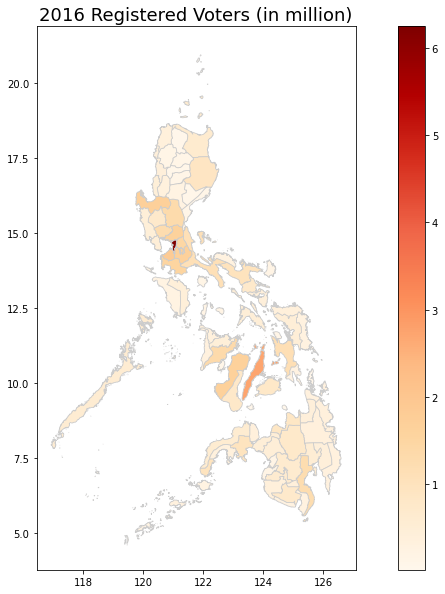

In [18]:
#Plotting
variable0 = "2016-Registered_Voters"

# set the range for the choropleth
vmin0, vmax0 = merged_data["2016-Registered_Voters"].min(), merged_data["2016-Registered_Voters"].max()

# create figure and axes for Matplotlib
fig, axes = plt.subplots(1, figsize=(15, 10))

#axes0
axes.set_title("2016 Registered Voters (in million)", size = 18)
merged_data.plot(column=variable0, cmap='OrRd', linewidth=0.8, ax=axes, edgecolor='0.8', vmin=vmin0, vmax=vmax0)
sm1 = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin0, vmax=vmax0))
cbar = fig.colorbar(sm1,ax=axes)

plt.savefig("2016 Registered Voters(in million)", transparent=True, bbox_inches='tight')

In [26]:
province_data.rename(columns = {'2016-Registered_Voters': '2016 Registered Voters (in million)'}, inplace= True)

province_data.sort_values(by='2016 Registered Voters (in million)', ascending=False, inplace = True)
province_data.set_index('Province').head(5)


,2016 Registered Voters (in million)
Province,
Metropolitan Manila,6.253249
Cebu,2.722288
Cavite,1.843163
Pangasinan,1.705260
Laguna,1.675366
